In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
def load_df_from_xlsx(filepath):
    df = pd.read_excel(filepath)  # Reads the first sheet by default
    return df

In [3]:
df = load_df_from_xlsx('Data/Stocks/stockHistoryAppl.xlsx')
df

,symbol,date,open,high,low,close,pre_market,after_hours,volume,status
0,AAPL,2025-11-03,270.420,270.85,266.2500,269.05,270.00,268.20,50184509,OK
1,AAPL,2025-10-31,276.990,277.32,269.1600,270.37,278.12,270.04,86167123,OK
2,AAPL,2025-10-30,271.990,274.14,268.4800,271.40,271.05,277.75,69886281,OK
3,AAPL,2025-10-29,269.275,271.41,267.1100,269.70,269.40,270.91,51086742,OK
4,AAPL,2025-10-28,268.985,269.89,268.1500,269.00,268.51,268.35,41534547,OK
...,...,...,...,...,...,...,...,...,...,...
1250,AAPL,2020-11-10,115.550,117.59,114.1300,115.97,116.84,116.05,135838990,OK
1251,AAPL,2020-11-09,120.500,121.99,116.0500,116.32,121.20,116.88,154497315,OK
1252,AAPL,2020-11-06,118.320,119.20,116.1300,118.69,117.77,118.52,113892922,OK
1253,AAPL,2020-11-05,117.950,119.62,116.8686,119.03,117.70,118.00,126261074,OK


In [4]:
def sort_df_by_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', ascending = True, inplace = True)
    df.reset_index(inplace = True)


In [5]:
sort_df_by_date(df)
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status
0,1254,AAPL,2020-11-04,114.140,115.59,112.3500,114.95,113.30,115.99,138217782,OK
1,1253,AAPL,2020-11-05,117.950,119.62,116.8686,119.03,117.70,118.00,126261074,OK
2,1252,AAPL,2020-11-06,118.320,119.20,116.1300,118.69,117.77,118.52,113892922,OK
3,1251,AAPL,2020-11-09,120.500,121.99,116.0500,116.32,121.20,116.88,154497315,OK
4,1250,AAPL,2020-11-10,115.550,117.59,114.1300,115.97,116.84,116.05,135838990,OK
...,...,...,...,...,...,...,...,...,...,...,...
1250,4,AAPL,2025-10-28,268.985,269.89,268.1500,269.00,268.51,268.35,41534547,OK
1251,3,AAPL,2025-10-29,269.275,271.41,267.1100,269.70,269.40,270.91,51086742,OK
1252,2,AAPL,2025-10-30,271.990,274.14,268.4800,271.40,271.05,277.75,69886281,OK
1253,1,AAPL,2025-10-31,276.990,277.32,269.1600,270.37,278.12,270.04,86167123,OK


In [6]:
def add_simple_moving_averages(df):
    df['SMA_5'] = df['close'].rolling(window=5).mean()
    df['SMA_50'] = df['close'].rolling(window=50).mean()
    df['SMA_100'] = df['close'].rolling(window=100).mean()
    return df

In [7]:
df = add_simple_moving_averages(df)
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status,SMA_5,SMA_50,SMA_100
0,1254,AAPL,2020-11-04,114.140,115.59,112.3500,114.95,113.30,115.99,138217782,OK,NaN,NaN,NaN
1,1253,AAPL,2020-11-05,117.950,119.62,116.8686,119.03,117.70,118.00,126261074,OK,NaN,NaN,NaN
2,1252,AAPL,2020-11-06,118.320,119.20,116.1300,118.69,117.77,118.52,113892922,OK,NaN,NaN,NaN
3,1251,AAPL,2020-11-09,120.500,121.99,116.0500,116.32,121.20,116.88,154497315,OK,NaN,NaN,NaN
4,1250,AAPL,2020-11-10,115.550,117.59,114.1300,115.97,116.84,116.05,135838990,OK,116.992,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4,AAPL,2025-10-28,268.985,269.89,268.1500,269.00,268.51,268.35,41534547,OK,263.732,245.6484,227.9202
1251,3,AAPL,2025-10-29,269.275,271.41,267.1100,269.70,269.40,270.91,51086742,OK,265.982,246.4312,228.5780
1252,2,AAPL,2025-10-30,271.990,274.14,268.4800,271.40,271.05,277.75,69886281,OK,268.346,247.3390,229.2775
1253,1,AAPL,2025-10-31,276.990,277.32,269.1600,270.37,278.12,270.04,86167123,OK,269.856,248.2484,229.9545


In [8]:
df = df.dropna()
df

,index,symbol,date,open,high,low,close,pre_market,after_hours,volume,status,SMA_5,SMA_50,SMA_100
99,1155,AAPL,2021-03-30,120.110,120.4031,118.86,119.90,120.78,119.93,84507919,OK,120.636,128.2595,126.2538
100,1154,AAPL,2021-03-31,121.650,123.5200,121.15,122.15,121.66,122.45,118323826,OK,121.048,128.1459,126.3258
101,1153,AAPL,2021-04-01,123.660,124.1800,122.49,123.00,123.45,123.00,75089134,OK,121.530,127.9653,126.3655
102,1152,AAPL,2021-04-05,123.870,126.1601,123.07,125.90,123.12,126.50,88251175,OK,122.468,127.7459,126.4376
103,1151,AAPL,2021-04-06,126.500,127.1300,125.65,126.21,125.33,126.33,80171253,OK,123.432,127.4887,126.5365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,4,AAPL,2025-10-28,268.985,269.8900,268.15,269.00,268.51,268.35,41534547,OK,263.732,245.6484,227.9202
1251,3,AAPL,2025-10-29,269.275,271.4100,267.11,269.70,269.40,270.91,51086742,OK,265.982,246.4312,228.5780
1252,2,AAPL,2025-10-30,271.990,274.1400,268.48,271.40,271.05,277.75,69886281,OK,268.346,247.3390,229.2775
1253,1,AAPL,2025-10-31,276.990,277.3200,269.16,270.37,278.12,270.04,86167123,OK,269.856,248.2484,229.9545


In [9]:
df.isnull().any()

index          False
symbol         False
date           False
open           False
high           False
low            False
close          False
pre_market     False
after_hours    False
volume         False
status         False
SMA_5          False
SMA_50         False
SMA_100        False
dtype: bool

In [10]:
def plot_column(df, column_name):
    plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w', edgecolor='k')
    plt.title(column_name, fontsize=30)
    plt.plot(df['date'], df[column_name])
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

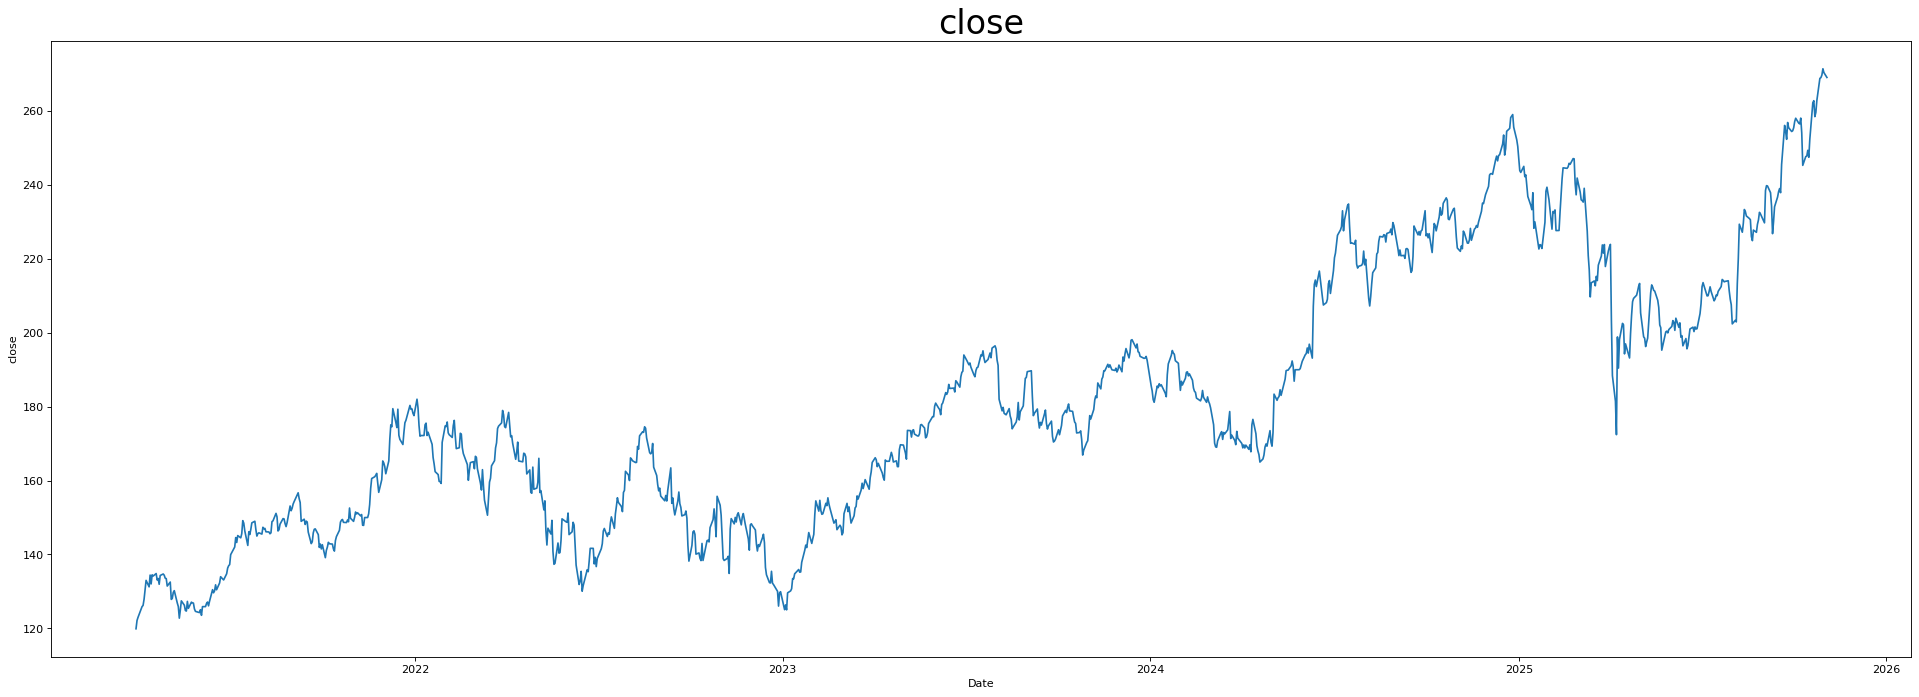

In [11]:
plot_column(df, 'close')

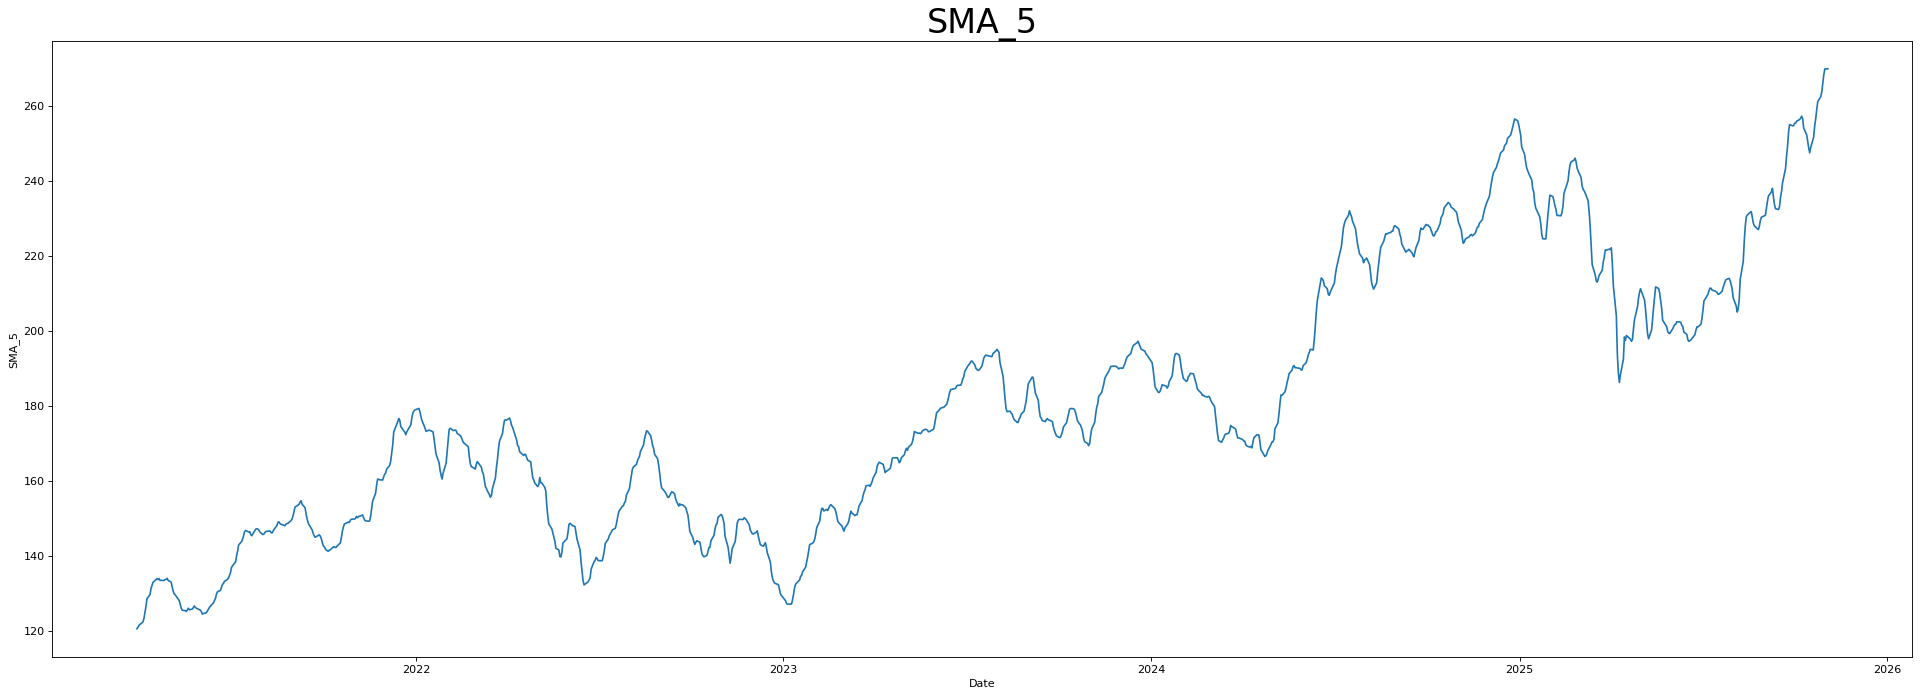

In [12]:
plot_column(df, 'SMA_5')

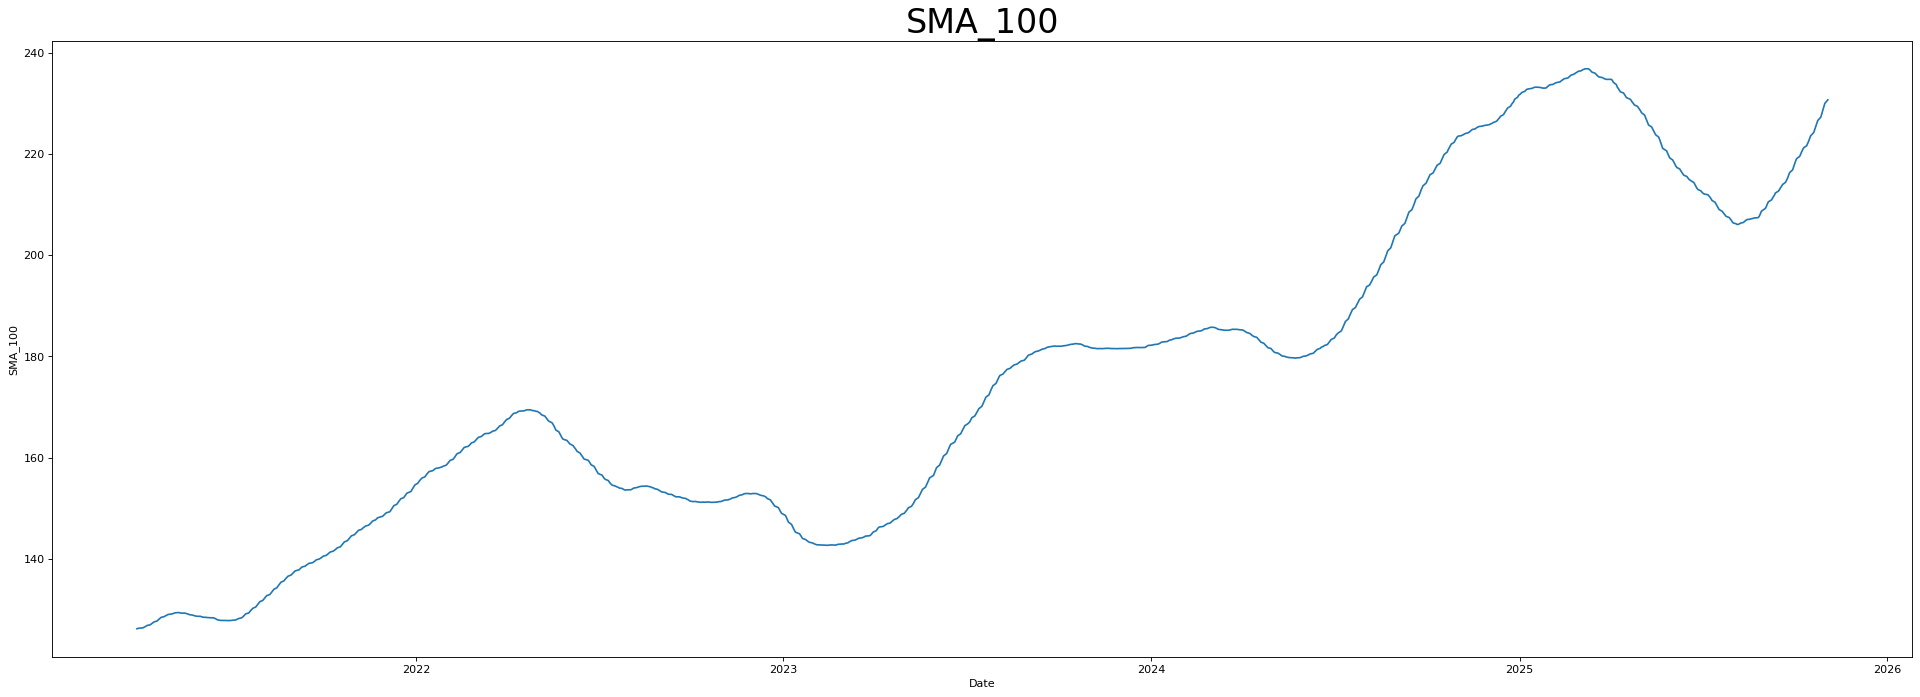

In [13]:
plot_column(df, 'SMA_100')

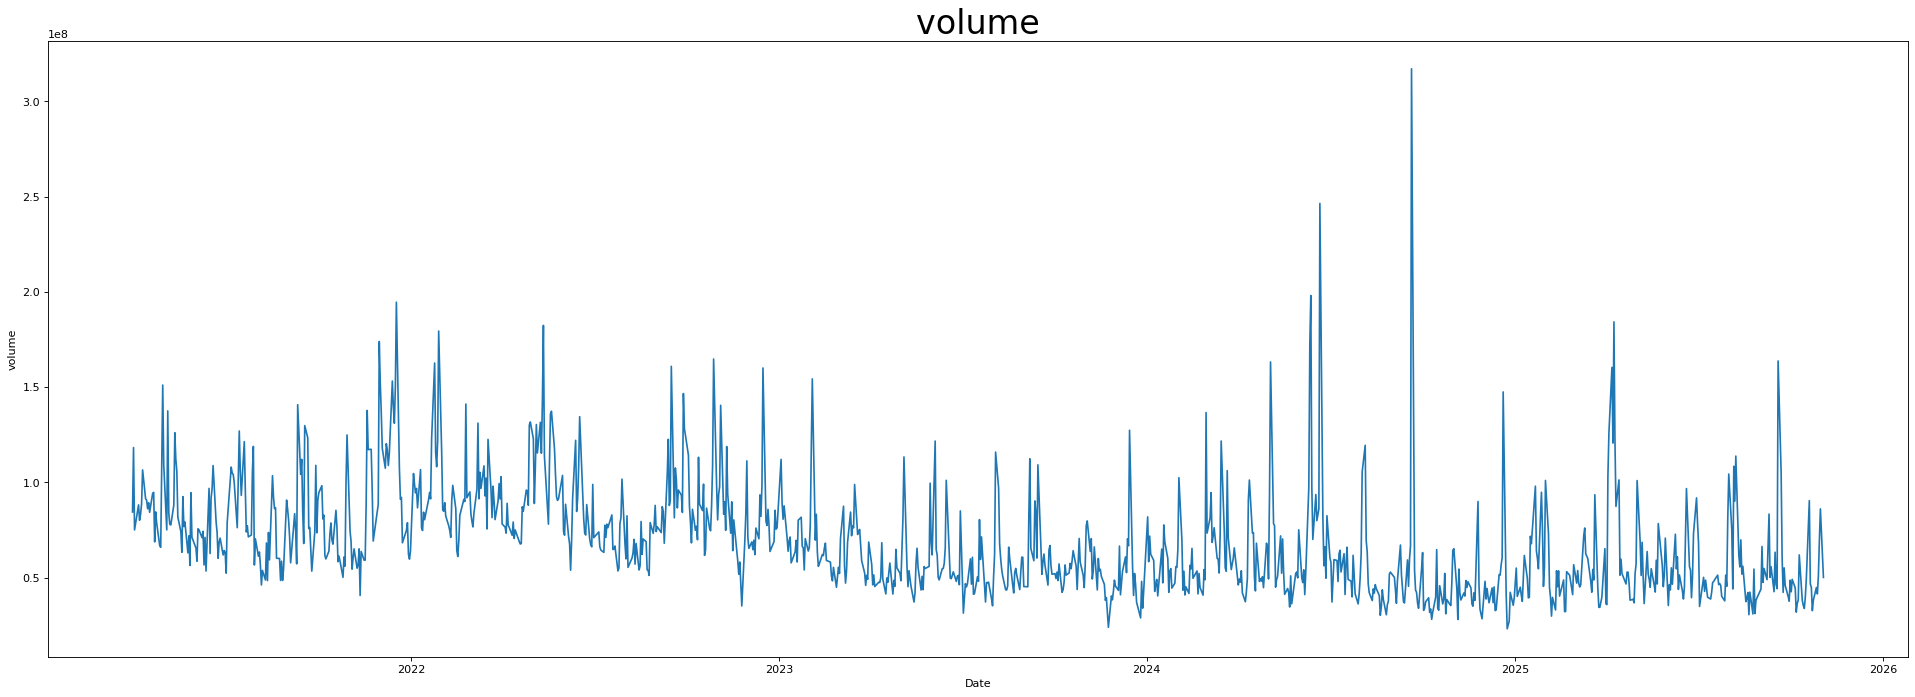

In [14]:
plot_column(df, 'volume')

In [15]:
features = ['open', 'high', 'low', 'close', 'pre_market', 'after_hours', 'volume', 'SMA_5', 'SMA_50', 'SMA_100']

In [16]:
df_for_training = df[features]
df_for_training

,open,high,low,close,pre_market,after_hours,volume,SMA_5,SMA_50,SMA_100
99,120.110,120.4031,118.86,119.90,120.78,119.93,84507919,120.636,128.2595,126.2538
100,121.650,123.5200,121.15,122.15,121.66,122.45,118323826,121.048,128.1459,126.3258
101,123.660,124.1800,122.49,123.00,123.45,123.00,75089134,121.530,127.9653,126.3655
102,123.870,126.1601,123.07,125.90,123.12,126.50,88251175,122.468,127.7459,126.4376
103,126.500,127.1300,125.65,126.21,125.33,126.33,80171253,123.432,127.4887,126.5365
...,...,...,...,...,...,...,...,...,...,...
1250,268.985,269.8900,268.15,269.00,268.51,268.35,41534547,263.732,245.6484,227.9202
1251,269.275,271.4100,267.11,269.70,269.40,270.91,51086742,265.982,246.4312,228.5780
1252,271.990,274.1400,268.48,271.40,271.05,277.75,69886281,268.346,247.3390,229.2775
1253,276.990,277.3200,269.16,270.37,278.12,270.04,86167123,269.856,248.2484,229.9545


In [17]:
scaler = StandardScaler()
df_for_training = scaler.fit_transform(df_for_training)
df_for_training

array([[-1.73384066, -1.77073638, -1.73207976, ..., -1.72757906,
        -1.51146375, -1.56091821],
       [-1.68985147, -1.68225051, -1.66617177, ..., -1.71573925,
        -1.51489955, -1.55866152],
       [-1.632437  , -1.66351373, -1.62760552, ..., -1.70188782,
        -1.52036173, -1.5574172 ],
       ...,
       [ 2.60452206,  2.59370986,  2.57410102, ...,  2.5172234 ,
         2.09005597,  1.66814886],
       [ 2.74734411,  2.68398707,  2.59367195, ...,  2.56061689,
         2.11756047,  1.68936804],
       [ 2.55967593,  2.50030985,  2.50991987, ...,  2.56199629,
         2.14253652,  1.71139273]])